In [578]:
# inicialización
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from random import randrange

# importando Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# importando visualización
from qiskit.visualization import plot_histogram

In [579]:
# Introducir nº qbits
num_qbits = 6
# Introducir nº de oráculos ( deben introducirse en la iteración ), en este caso hay 2
k = 2

# Declaración registros
qr = QuantumRegister(num_qbits)
cr = ClassicalRegister(num_qbits)
# Si estamos usando más de 3 qbits necesitamos un aux para la gate mct
if num_qbits > 3:
    aux = QuantumRegister(num_qbits-3)
    groverCircuit = QuantumCircuit(qr,cr, aux)
else:
    aux = None
    groverCircuit = QuantumCircuit(qr,cr)

In [580]:
# Hadamard inicial
groverCircuit.h(qr)

In [581]:
# Oráculo e inversión de la media

result = math.pi*math.sqrt((2**num_qbits)/k)/4 # Cálculo de las iteraciones
iterations = round(result)
print("Número de iteraciones %d"%iterations)

# Añadimos oraculo e inversa de la media por iteración
for i in range(iterations-1): # pi * ((2^n)^(1/2))/ 4
    groverCircuit.barrier(qr)
    # Oraculo 111101
    groverCircuit.x(qr[1])
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.x(qr[1])  
    
    # Oraculo 110111
    groverCircuit.x(qr[3])
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.x(qr[3])  
    
    # Inversa de la media
    groverCircuit.barrier(qr)
    groverCircuit.h(qr)
    groverCircuit.x(qr)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.x(qr)
    groverCircuit.h(qr)

groverCircuit.barrier(qr)



Número de iteraciones 4


In [582]:
# Circuito obtenido
groverCircuit.draw(output="mpl")

In [583]:
# Simulación por statevector
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[-0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.66967773+0.j
 -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j -0.04077148+0.j
 -0.04077148+0.j -0.66967

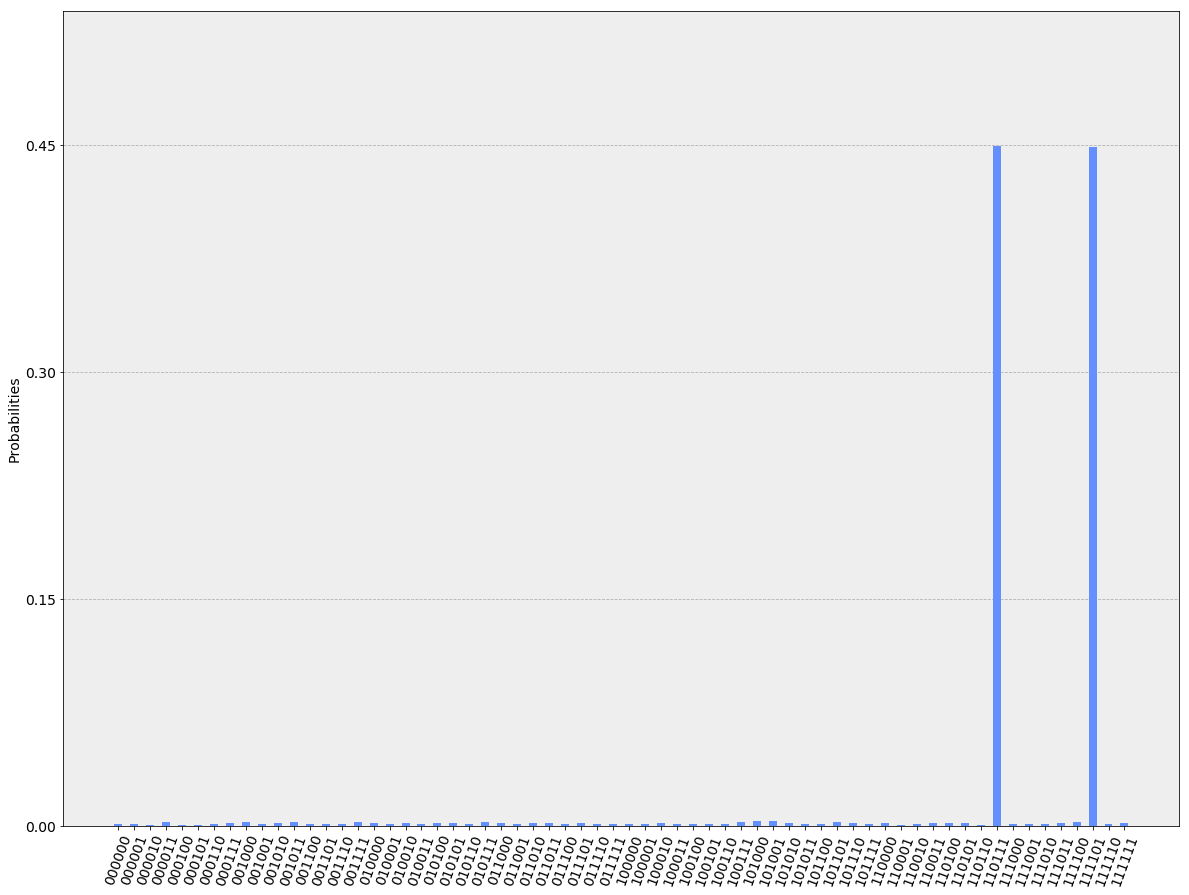

In [585]:
# Simulación por qasm e histograma
groverCircuit.measure(qr,cr)
backend = BasicAer.get_backend('qasm_simulator')
shots = 5000
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize=[20,15], bar_labels=False)

In [586]:
# Carga de cuenta de IBMQ
provider = IBMQ.load_account()
# Selección del provider de 32 qbits
device = provider.get_backend('ibmq_qasm_simulator')
print("Ejecutandose en: ", device)

d:\anaconda3\envs\tensorflow-gpu\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Ejecutandose en:  ibmq_qasm_simulator


In [587]:
# Monitorización
from qiskit.tools.monitor import job_monitor
job = execute(groverCircuit, backend=device, shots=5000, max_credits=14)
job_monitor(job, interval = 2)

Job Status: job has successfully run


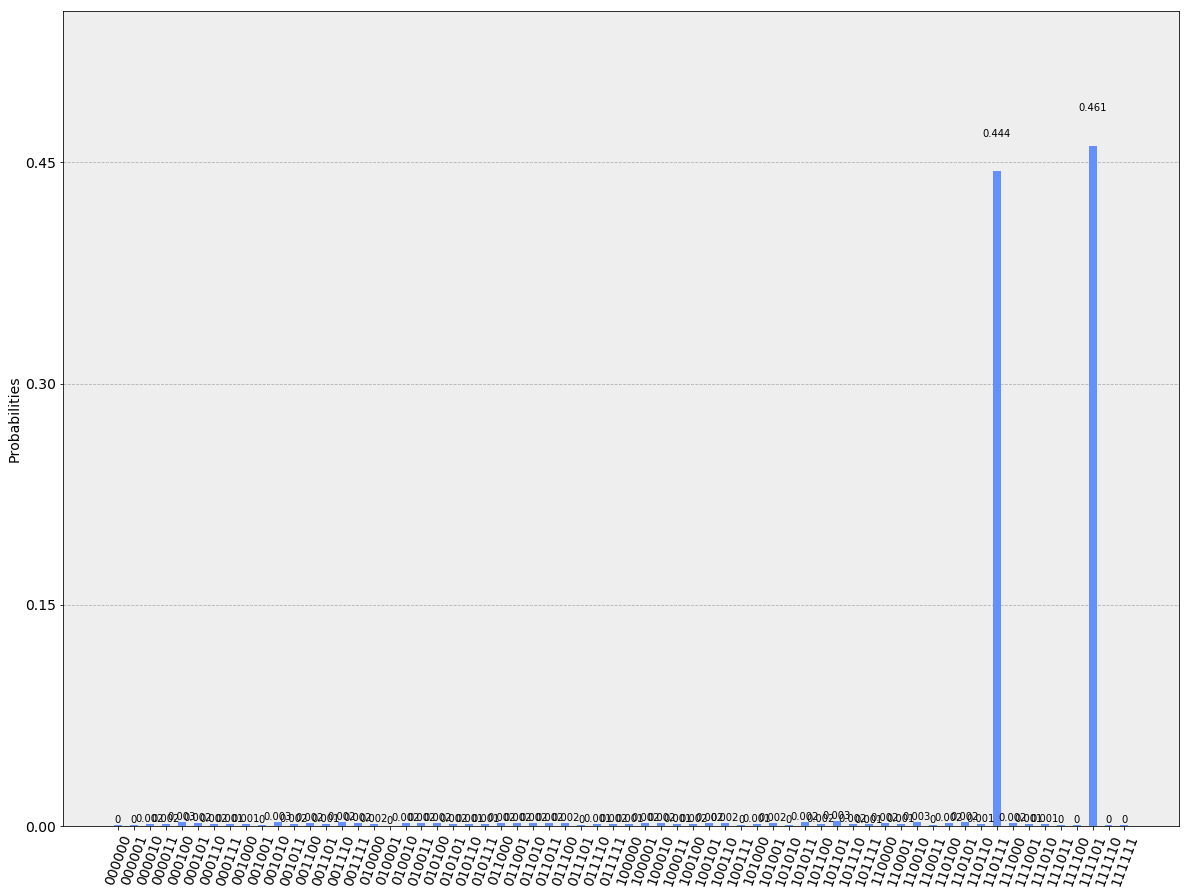

In [588]:
# Resultados
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer, figsize=[20,15], bar_labels=True)